In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

In [2]:
CIR_EXPECTED_LEN = 128

In [13]:
f = open("putty.log", 'r')
CIR_LIST = []

while True:
    line = f.readline()
    if not line:
        break
    if "CIR" in line[0:3]:
        CIR = np.zeros([CIR_EXPECTED_LEN], dtype=np.complex64)
        CIR_ASCII = line.split(" ")[-1].replace("\n","")
        if((len(CIR_ASCII) != (CIR_EXPECTED_LEN *8))):
            print(f"Lost sample(len={len(CIR_ASCII)})")
            continue

        #print(CIR_ASCII)
        for i in range (0, CIR_EXPECTED_LEN):
            #print(f"{CIR_ASCII[i*8+2:i*8+4]}{CIR_ASCII[i*8+0:i*8+2]}")
            I = struct.unpack('<h', bytes.fromhex(CIR_ASCII[i*8+0:i*8+4]))
            Q = struct.unpack('<h', bytes.fromhex(CIR_ASCII[i*8+4:i*8+8]))
            CIR[i] = I[0] + (Q[0]*1j)

        CIR_LIST.append(CIR)

Lost sample(len=1074)
Lost sample(len=406)


In [15]:
CIR_LIST = np.vstack(CIR_LIST)

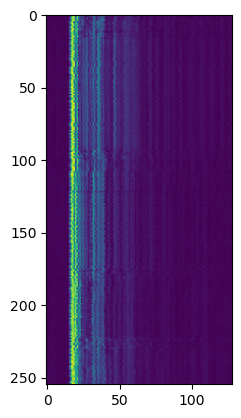

In [21]:
plt.imshow(np.abs(CIR_LIST))